In [1]:
#meta: 10/29/2019 Ex1.  Linear regression.  
# Multivariate linear regression - predict price of houses.  
# src Coursera, Standford ML course - refactor in python
# src for markup https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise1/exercise1.ipynb


#see ex1.pdf
#Numbering per original assignments

#based on: ex1_LinearRegressionUni.ipynb
#     10/10/2019 GD
#      EDA plot training data
#      Define Cost function J
#      Define Gradient Descent function
#      Fit parameters theta to X,y data
#      Result: linear model with one variable
#      Plot linear regression
#prev 10/12/2019 Use numpy 
#      numpy for data load (not pandas)
#      Visualize J(θ) - surface and contour plots

#here 1/14/2020 Multivariate linear regression
#     Input: 2 variables, Output: house price


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d #to plot in 3D

- Define global variables and functions

In [3]:
def computeCost(X,y,theta, verbose=False):
    """ function ComputeCost
    
    Objective
    =========
    Compute cost for linear regression 
    using theta as the parameter for linear regression 
    to fit the data points in X and y
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    
    Returns
    =========
    cost function J, type float

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """
    #initialize vars
    J=0
    m = y.size # number of training examples
    
    #compute hypothesis
    ###print('theta.T ', theta.T)
    y_hat = np.dot( theta.T, X )
    if verbose:
        print('y_hat ', y_hat)
    
    #compute error
    error = y_hat - y
    error_sqrd = error**2
    #print('J', error_sqrd.sum() / (2*m))
    #compute cost     
    J = error_sqrd.sum() / (2*m)
    
    return J

In [4]:
def featureNormalize(X):
    """ function featureNormalize
    
    Objective
    =========
    Normalizes the features in X 
        
    Paremeters
    =========
    input  X - matrix shape (m, n)
    
    Returns
    =========
    z-score matrix, mu and sigma
    
    Notes
    ========= 
    preprocessing step to scale features of different magnitude
    
    """
    #compute
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    deviation = X - mu
    z = deviation / sigma
    
    return z, mu, sigma

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters, verbose=False):
    """ function ComputeCost
    
    Objective
    =========
    Fit the linear regression parameters θ to our dataset
    Minimize the value of J(θ) by changing the values of the vector θ (not by changing X or y)
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    alpha - learning rate 
    num_iters - number of iterations
    
    Returns
    =========
    updated theta
    J history

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)
    error = y_hat - y   =>                        shape (1, m)     (same as y)
    gradient = vector                             shape (n+1, )    (same as theta)
    X * (error/m).T => (n+1, m) x (m, 1) =>       shape  n+1, ) 

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """

    #Initialize vars
    m = X.shape[1]; # number of training examples
    J_history = np.zeros(num_iters)
    
    #Compute theta
    for i in np.arange(0, num_iters):
        #compute hypothesis
        y_hat = np.dot(theta.T, X)
        #compute error
        error = y_hat - y
        
        #calculate gradient - see my notes        
        gradient = np.dot(X, (error/m).T)
        theta_temp = theta - alpha * gradient
        theta = theta_temp
        
        #Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)
        
        #preview
        i_preview = 10
        if verbose:
            if (i < i_preview) or (i > (iterations - i_preview)):
                print ("i: {}, \ngradient: {}, \nupdated theta: {}, \nupdated cost: {}\n".format(i, gradient, theta_temp, J_history[i]))

    return theta, J_history


# 3. Linear regression with multiple variables
Implement linear regression with multiple variables to predict the prices of houses.

## Predict Price of Houses
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.  

Dataset:    
- size of house (in sqft)  
- number of bedrooms  
- price of house


## 3.0 Load Data
package: numpy

In [6]:
data = np.loadtxt('data/ex1/ex1data2.txt', delimiter=',',skiprows=0 ) #unpack=True
print(data.shape)
#preview data
print("Preview dataset\n")
print( "1) size of house, 2) # of bedrooms, 3) price of house: \n", data[:5, :])


(47, 3)
Preview dataset

1) size of house, 2) # of bedrooms, 3) price of house: 
 [[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


- Split data into Input and Output

In [7]:
X=data[:,0:2]
y=data[:,2]


- Number of records

In [8]:
#m - number of data points, training examples
m=y.size

## 3.1 Feature Normalization

#### Scale features and set them to zero mean
X_norm is a normalized version of X where the mean value of each feature is 0 and  the standard deviation is 1. 
This is often a good preprocessing step to do when working with learning algorithms.


In [9]:
X_norm, mean, std = featureNormalize(X)

#preview results
print("mu: {}, \nsigma: {}".format(mean, std))
print("\nX normalized: \n{}".format(X_norm[:5]))

mu: [2000.68085106    3.17021277], 
sigma: [7.86202619e+02 7.52842809e-01]

X normalized: 
[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


#### Build X and y
  
*X*  
- intercept term  
- size of house (in sqft)  
- number of bedrooms  

*y* - price of house


In [10]:
# Add intercept term to X
X_norm = np.concatenate((np.ones((m,1)), X_norm), axis=1)
print('X_norm shape: ', X_norm.shape)
#preview
X_norm[:5,]

X_norm shape:  (47, 3)


array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [11]:
#Scale y values for easier Cost and Gradient Descent computation
y_scaled = y / 1000
y_scaled[:5] #.__class__ np.ndarray


array([399.9, 329.9, 369. , 232. , 539.9])

- Number of features

In [12]:
#n - mumber of features
n = X_norm.shape[1]

print ("# of records: {}".format(m))
print("# of features: {}".format(n))


# of records: 47
# of features: 3


## 3.2  Gradient Descent
Objective: fit the linear regression parameters $\theta$  to our dataset using gradient descent.

### 3.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-info">
**Implementation Note:**<br>
We store each example as a row in the the $X$ matrix in Python `numpy`.<br>
To take into account the intercept term $\theta_0$, we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

### 3.2.2 Implementation
We have already set up the data for linear regression.  
In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term.  
We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

<div class="alert alert-success">
myNote:<br>
*X* (matrix)  - input features<br>
*y* (vector)  - output variable<br>
$\theta$ (vector) - parameters<br>
<br>
dim:<br>
*n* - rows, here # of features<br>
*m* - columns, here # of training examples
</div>

- Initialize fitting parameters

In [13]:
#initialize fitting parameters
#np.array([[0],[0]])
theta = np.zeros((n, 1))
print('θ shape: ', theta.shape)
print('θ: \n',theta)

#initialize gradient descent settings
iterations = 50000
alpha = 0.01


θ shape:  (3, 1)
θ: 
 [[0.]
 [0.]
 [0.]]


### 3.2.3 Test the cost function
Run computeCost using $\theta$ initialized to zeros.  

In [14]:
#Shapes of params Theta, Input and Output 
print(theta.shape)
print(X_norm.T.shape)
print(y_scaled.shape)


(3, 1)
(3, 47)
(47,)


In [15]:
# Use and validate function
print(computeCost(X_norm.T, y_scaled, theta))


65591.54810645744


After y scaling  
J = 65591.54810645744

Before y scaling  
J = 65591548106.45744  


### 3.2.4 Gradient descent
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. 

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.


<div class="alert alert-success">
myNote:<br>
X matrix        (3,47)<br> 
y               (1,47)<br>
theta vector    (3,1)<br>
<br>
Matrix multiplication:<br>
y_hat = theta.T $*$ X => (1,3) x (3,47) = (1,47)   (same as y)<br>
error = y_hat - y => (1,47)                      (same as y)<br>
gradient = X $*$ (error/m).T  => (3,47) x (47,1) => vecor (3,1) (same as theta)
</div>

- Run gradient descent (verbose mode)

In [16]:
#initialize theta
theta = None
theta = np.zeros((n, 1))
print("initial theta: {}\n".format(theta))
print("updated theta and J history")
theta, J_history = gradientDescent(X_norm.T, y_scaled, theta, alpha, iterations, verbose=True)

initial theta: [[0.]
 [0.]
 [0.]]

updated theta and J history
i: 0, 
gradient: [[-340.41265957]
 [-105.76413349]
 [ -54.70882176]], 
updated theta: [[3.4041266 ]
 [1.05764133]
 [0.54708822]], 
updated cost: 64297.77625162011

i: 1, 
gradient: [[-337.00853298]
 [-104.4001407 ]
 [ -53.56948908]], 
updated theta: [[6.77421193]
 [2.10164274]
 [1.08278311]], 
updated cost: 63031.01830552134

i: 2, 
gradient: [[-333.63844765]
 [-103.05616772]
 [ -52.44918764]], 
updated theta: [[10.1105964 ]
 [ 3.13220442]
 [ 1.60727498]], 
updated cost: 61790.69423753246

i: 3, 
gradient: [[-330.30206317]
 [-101.73190779]
 [ -51.34761502]], 
updated theta: [[13.41361703]
 [ 4.1495235 ]
 [ 2.12075113]], 
updated cost: 60576.23690199104

i: 4, 
gradient: [[-326.99904254]
 [-100.42705891]
 [ -50.26447355]], 
updated theta: [[16.68360746]
 [ 5.15379409]
 [ 2.62339587]], 
updated cost: 59387.09173998858

i: 5, 
gradient: [[-323.72905212]
 [ -99.14132376]
 [ -49.19947022]], 
updated theta: [[19.92089798]
 [ 6.14

In [17]:
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [[340.41265957]
 [109.44779647]
 [ -6.57835485]]



### Predict
- Estimate the price of a 1650 sq-ft, 3 br house.  
Vectorization: Use matrix multiplication, rather than explicit summation or looping, to calculate the predictions.

In [18]:
#to predict, 
# take input, normalize it, add an intercept
y_test  = np.array([1650, 3])
y_test_norm = (y_test - mean) / std
y_test_norm = np.concatenate((np.ones(1), y_test_norm), axis=0)
y_test_norm

array([ 1.        , -0.44604386, -0.22609337])

In [19]:
y_hat = np.dot(theta.T, y_test_norm.T)
y_hat
print("Prediction price of a 1650 sq-ft and 3 br house: $ {}".format(round(y_hat[0] * 1000, 2)))

Prediction price of a 1650 sq-ft and 3 br house: $ 293081.46


- Predict single and multi records

In [20]:
print(X_norm[:5,])
y[:5]

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


array([399900., 329900., 369000., 232000., 539900.])

In [21]:
predict1 = np.dot(theta.T, [[1], [0.13141542], [-0.22609337]])
print(predict1)

predict2 = np.dot(theta.T, X_norm[:5,].T)
print(predict2)

[[356.28311013]]
[[356.28311034 286.12093063 397.48946985 269.24418573 472.27785515]]


Predict2 dims: (1 x 3) x (3 x 5) = 1 x 5

### Xtra
smart examples

In [22]:
#$xtra verify results of featureNormalize
print(X[:,0].max())
print((X[:,0].max() - mean[0])/std[0])
print(X_norm[:,0].max())


4478.0
3.15099325527155
1.0


In [23]:
#$xtra Generate linearly and logarithmically spaced vectors
#Linspace gives evenly spaced samples
print(np.linspace(0,100,11))
#Logspace returns even spaced numbers on a log scale
print(np.logspace(-2, 3, 6))

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


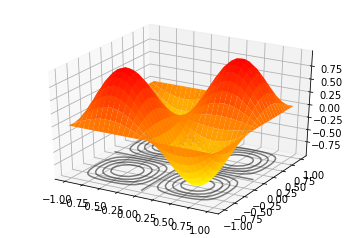

In [24]:
#$xtra Surface and contour plot example
#src https://stackoverflow.com/questions/35445424/surface-and-3d-contour-in-matplotlib
#import numpy as np
#from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)

ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0, rstride=1, cstride=1)
#ax.contour(X, Y, Z+1, 10, lw=3, colors="k", linestyles="solid")
ax.contour(X, Y, Z, 10, offset=-1, colors="k", linestyles="solid", alpha=0.5) #lw=3, 
plt.show()

In [25]:
### $acdelete 
'''#$ac Xtra -> doc & delete
zz = np.array([np.ones(n)])
zz = np.array([[3],[4],[5]])
print (zz)
print(zz.shape)
print(X_norm.shape)
print(y.shape)

print(np.dot(zz.T, X_norm.T)) #1 x 47
#print(np.dot(X_norm, zz.T)) #47 x 1
#y

### $acdelete
#X2 = np.concatenate(np.ones(m), X, axis=0)
X2 = np.concatenate((np.ones((m,1)), X), axis=1)

X2[:4]'''

'#$ac Xtra -> doc & delete\nzz = np.array([np.ones(n)])\nzz = np.array([[3],[4],[5]])\nprint (zz)\nprint(zz.shape)\nprint(X_norm.shape)\nprint(y.shape)\n\nprint(np.dot(zz.T, X_norm.T)) #1 x 47\n#print(np.dot(X_norm, zz.T)) #47 x 1\n#y\n\n### $acdelete\n#X2 = np.concatenate(np.ones(m), X, axis=0)\nX2 = np.concatenate((np.ones((m,1)), X), axis=1)\n\nX2[:4]'

In [26]:
def gradientDescent_draft(X,y,theta, alpha, num_iters):
    """ function ComputeCost
    
    Objective
    =========
    Fit the linear regression parameters θ to our dataset
    Minimize the value of J(θ) by changing the values of the vector θ (not by changing X or y)
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    alpha - learning rate 
    num_iters - number of iterations
    
    Returns
    =========
    updated theta
    J history

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)
    error = y_hat - y   =>                        shape (1, m)     (same as y)
    gradient = vector                             shape (n+1, )    (same as theta)
    X * (error/m).T => (n+1, m) x (m, 1) =>       shape  n+1, ) 

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """

    #Initialize vars
    m = X.shape[1]; # number of training examples
    J_history = np.zeros(num_iters)
    
    #Compute theta
    for i in np.arange(0, num_iters):
        #compute hypothesis
        y_hat = np.dot(theta.T, X)
        #compute error
        error = y_hat - y
        
        #calculate gradient - see my notes        
        gradient = np.dot(X, (error/m).T)
        theta_temp = theta - alpha * gradient
        theta = theta_temp
        
        #Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)
        
        #preview
        i_preview = 10
        if (i < i_preview) or (i > (iterations - i_preview)):
            print ("i: {}, \ngradient: {}, \nupdated theta: {}, \nupdated cost: {}\n".format(i, gradient, theta_temp, J_history[i]))
        
    return theta, J_history
